In [1]:
import pandas as pd
import numpy as np
pd.set_option("display.max_rows", 500)
pd.set_option("display.max_columns", 500)

In [2]:
df = pd.read_csv("CarPrice.csv")
df.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,four,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,five,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


`Curb weight` is the weight of the vehicle including a full tank of fuel and all standard equipment

`Information about Fuel System` <br><br>
MPFI: Multi-Point Fuel Injection. This system injects fuel into each intake port of the engine's cylinder head, delivering fuel to multiple points simultaneously. It provides precise fuel distribution and is commonly found in modern gasoline engines.

2BBL: Two-Barrel Carburetor. This refers to a carburetor with two primary fuel barrels or venturis. Each barrel supplies fuel to a set of cylinders in the engine. It was commonly used in older vehicles but has been largely replaced by fuel injection systems.

MFI: Multi-Point Fuel Injection. Similar to MPFI, this term also refers to a fuel injection system that injects fuel into multiple points in the intake manifold or cylinder head. It is often used as a general term for multi-point injection systems.

1BBL: Single-Barrel Carburetor. This type of carburetor has only one primary fuel barrel or venturi, supplying fuel to all the cylinders in the engine. It was commonly used in older, smaller engines.

SPFI: Single-Point Fuel Injection. In this system, a single injector is used to deliver fuel to all the cylinders in the engine. It is typically found in older fuel-injected engines and is less common in modern vehicles.

4BBL: Four-Barrel Carburetor. This refers to a carburetor with four primary fuel barrels or venturis, providing fuel to each cylinder individually. It was used in high-performance engines and is now mostly replaced by fuel injection systems.

IDI: Indirect Injection. This fuel system uses a pre-chamber or swirl chamber to introduce fuel into the combustion chamber indirectly. It is commonly used in diesel engines and helps with fuel atomization and combustion efficiency.

SPDI: Single-Point Direct Injection. This system uses a single fuel injector to directly inject fuel into the combustion chamber or intake port of each cylinder. It is commonly found in some older or less advanced gasoline engines.

In [3]:
df['fuelsystem'].unique()

array(['mpfi', '2bbl', 'mfi', '1bbl', 'spfi', '4bbl', 'idi', 'spdi'],
      dtype=object)

In [4]:
df['aspiration'].unique()

array(['std', 'turbo'], dtype=object)

In [5]:
len(df.CarName.unique())

147

In [6]:
features = df.drop(['price','CarName', 'car_ID', 'boreratio', "compressionratio", 'horsepower', 'enginelocation','drivewheel'], axis=1)
target = df.price

features.columns


Index(['symboling', 'fueltype', 'aspiration', 'doornumber', 'carbody',
       'wheelbase', 'carlength', 'carwidth', 'carheight', 'curbweight',
       'enginetype', 'cylindernumber', 'enginesize', 'fuelsystem', 'stroke',
       'peakrpm', 'citympg', 'highwaympg'],
      dtype='object')

One hot Encoding

In [7]:
features1 = pd.get_dummies(features)
features1.columns

Index(['symboling', 'wheelbase', 'carlength', 'carwidth', 'carheight',
       'curbweight', 'enginesize', 'stroke', 'peakrpm', 'citympg',
       'highwaympg', 'fueltype_diesel', 'fueltype_gas', 'aspiration_std',
       'aspiration_turbo', 'doornumber_four', 'doornumber_two',
       'carbody_convertible', 'carbody_hardtop', 'carbody_hatchback',
       'carbody_sedan', 'carbody_wagon', 'enginetype_dohc', 'enginetype_dohcv',
       'enginetype_l', 'enginetype_ohc', 'enginetype_ohcf', 'enginetype_ohcv',
       'enginetype_rotor', 'cylindernumber_eight', 'cylindernumber_five',
       'cylindernumber_four', 'cylindernumber_six', 'cylindernumber_three',
       'cylindernumber_twelve', 'cylindernumber_two', 'fuelsystem_1bbl',
       'fuelsystem_2bbl', 'fuelsystem_4bbl', 'fuelsystem_idi',
       'fuelsystem_mfi', 'fuelsystem_mpfi', 'fuelsystem_spdi',
       'fuelsystem_spfi'],
      dtype='object')

### Feature Scaling

In [8]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler

mms = MinMaxScaler()
features2 = mms.fit_transform(features1)


In [9]:
target.dtype

dtype('float64')

### Split the Feature and target

In [10]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(features2, target,test_size=0.25, random_state=4)
print("X_train, X_test, y_train, y_test", X_train.shape, X_test.shape, y_train.shape, y_test.shape)

X_train, X_test, y_train, y_test (153, 44) (52, 44) (153,) (52,)


### Model building

In [11]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from lightgbm import LGBMRegressor


RandomForestRegresorrs

In [12]:
clf = RandomForestRegressor(n_estimators=150)
clf.fit(X_train, y_train)

pred = clf.predict(X_test)
print("Predict: ",pred)

print("mean squeared error: ", mean_squared_error(y_test, pred))

Predict:  [13019.43333333 13853.67556     6435.85333333 15213.93778667
 37047.81666667  8339.42       16902.47002    15082.27334667
 14160.31444667 17201.78778    13567.73666667 16762.36111333
  8861.21        6316.34        6345.47333333 29721.86444667
  9242.66666667  9343.88       16370.76889333 14457.01556
 19323.18666667  6487.34333333  7281.77333333  9288.81111111
 15810.88666667  5798.75        7467.54333333  9203.71
  7810.08        7644.89666667  7117.20333333 16635.32
 20476.53556     7384.92       15863.65333333 37573.17666667
 15105.19333333 19817.36666667 16581.42       12349.74666667
  7295.96        7805.68666667  6830.22        6620.56666667
  7779.86666667  6054.38       12281.84111111 37573.17666667
 10160.20666667  6390.29333333 18246.70666667  7900.84666667]
mean squeared error:  4340949.445367906


<Axes: xlabel='price', ylabel='Count'>

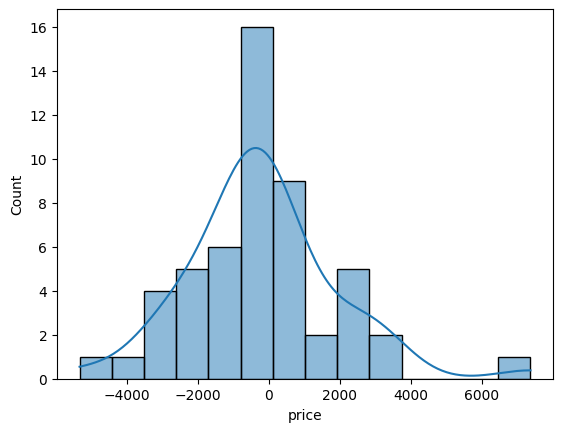

In [13]:
import seaborn as sns

sns.histplot(y_test - pred, kde=True) 

In [14]:
import matplotlib.pyplot as plt

<BarContainer object of 44 artists>

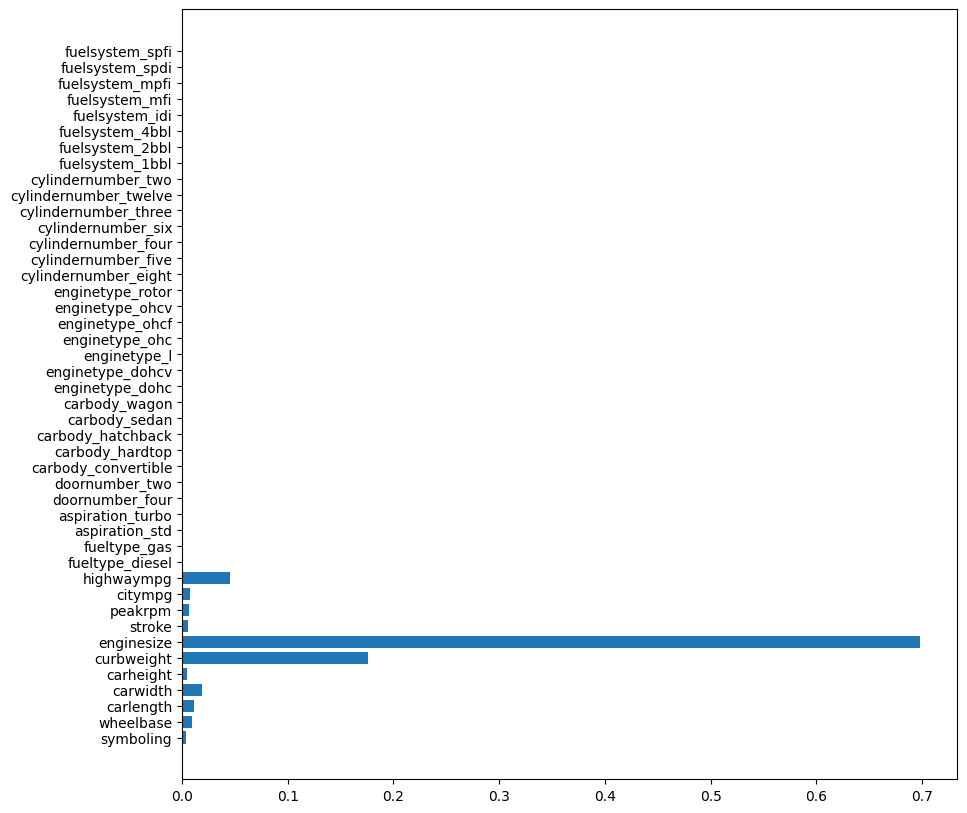

In [15]:
plt.figure(figsize=(10,10))
plt.barh(features1.columns, clf.feature_importances_)

In [16]:
clf2 = SVR(C=45)
clf2.fit(X_train, y_train)

pred = clf2.predict(X_test)
print("Predict: ",pred)

print("mean squeared error: ", mean_squared_error(y_test, pred))


Predict:  [10315.13625846 10122.5574721   9386.2110613  10628.82542715
 10693.69507055 10128.59938188 10608.75262227 10485.11250711
 10093.93145149 10578.30260865 10177.67327623 10218.7720848
 10277.54104177  9680.16382654  9680.56984302 10476.9001731
  9471.51798983 10354.539284   10565.61081801 10125.95775463
 10305.45913557  9375.26692706  9460.10049283  9476.82161398
 10482.84286874  9940.85022034  9499.7534913  10118.52523741
  9503.46602686 10023.18919206  9484.04820012 10537.15174373
 10544.36062807  9500.44952003 10567.3588261  10726.37518564
 10234.81810307 10529.18322528 10282.36401676 10130.3664736
  9482.8468721   9736.06669446  9475.62142513  9396.1796537
 10106.7173958   9373.28523994 10143.0701908  10726.37518564
 10124.23267263  9405.85713106 10477.28008237 10011.73146983]
mean squeared error:  59500481.07559096


In [17]:
clf3 = DecisionTreeRegressor()
clf3.fit(X_train, y_train)

pred = clf3.predict(X_test)
print("Predict: ",pred)

print("mean squeared error: ", mean_squared_error(y_test, pred))

Predict:  [13495.  14489.   6669.  13499.  25552.   8495.  17199.  15250.  12964.
 15985.  13950.  16515.   8558.   6855.   6855.  30760.   9549.   8948.
 16558.  14489.  18920.   6488.   8916.5  8845.  16630.   5118.   7299.
  9980.   7999.   7499.   7395.  17075.  18920.   7299.  16900.  36880.
 12170.  19045.  15985.  11549.   7299.   7775.   6692.   6669.   7775.
  5572.  13950.  36880.   9639.   6229.  21105.   7957. ]
mean squeared error:  5712475.096153846


<BarContainer object of 44 artists>

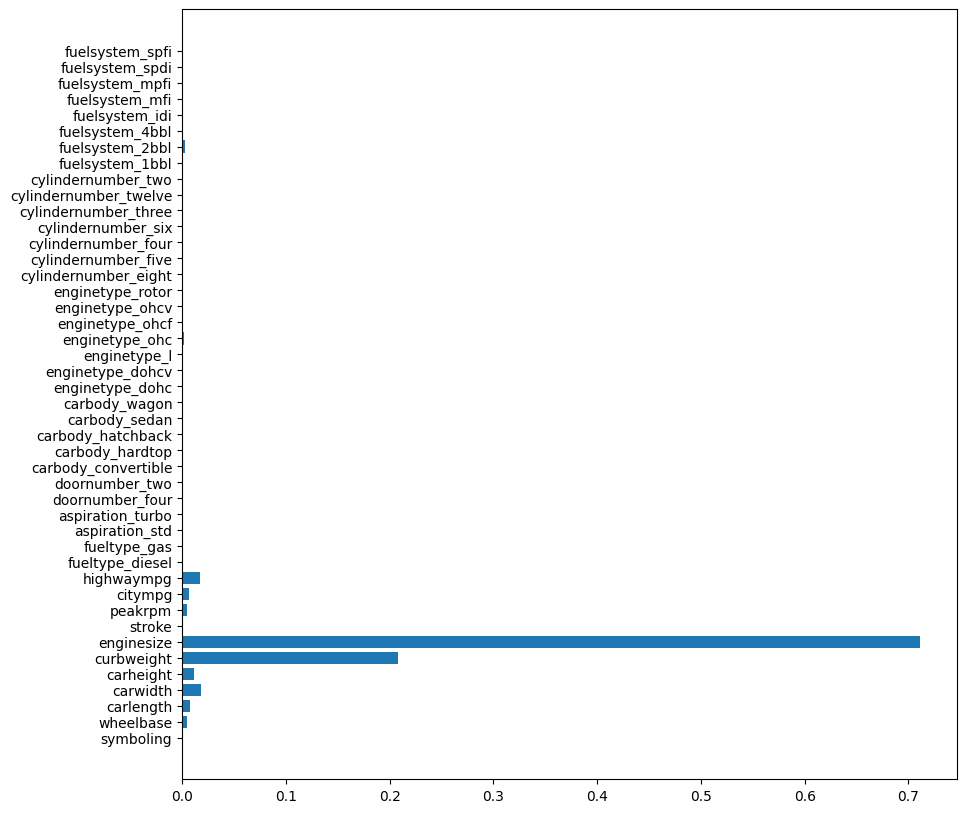

In [18]:
plt.figure(figsize=(10,10))
plt.barh(features1.columns, clf3.feature_importances_)

### Hence by considering above model and tuning the parameters, `Random forest Regressor` works best on it

In [20]:
# randomized search CV

# no. of trees in forest
n_estimators = [int(x) for x in np.linspace(start = 100 , stop = 1200, num = 12)]

# no. of features to consider at every split
max_feature = ['auto','sqrt']

#maximum no. of levelsin tree
max_depth = [int(x) for x in np.linspace(5,30, num = 6)]

#minimum no. of sample required to split a node
min_samples_split = [2,5,10,15,100]

#min. no. samples required at each leaf node
min_samples_leaf = [1,2,5,10]

random_grid = {'n_estimators': n_estimators,
               'max_features': max_feature,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf
              }

In [21]:
from sklearn.model_selection import RandomizedSearchCV

In [22]:
rf_random = RandomizedSearchCV(estimator= clf, param_distributions= random_grid, scoring='neg_mean_squared_error', n_iter= 10, cv= 5, random_state=42, n_jobs= 1)

In [23]:
rf_random.fit(X_train,y_train)

pred = rf_random.predict(X_test)

mean_squared_error(y_test, pred)


c:\Users\Hetam\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
c:\Users\Hetam\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
c:\Users\Hetam\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `ma

3906742.7736141835